# 2D Split Operator Method

In [1]:
import numpy as np

from helpers.physics2dsim_split import * 
from helpers.plotting import *
from helpers.logging import *
from helpers.video import *

## 2D Simulator - Time Operators

- 2000 frames
- 512 x 512 (a true minimum) for these types of simulations



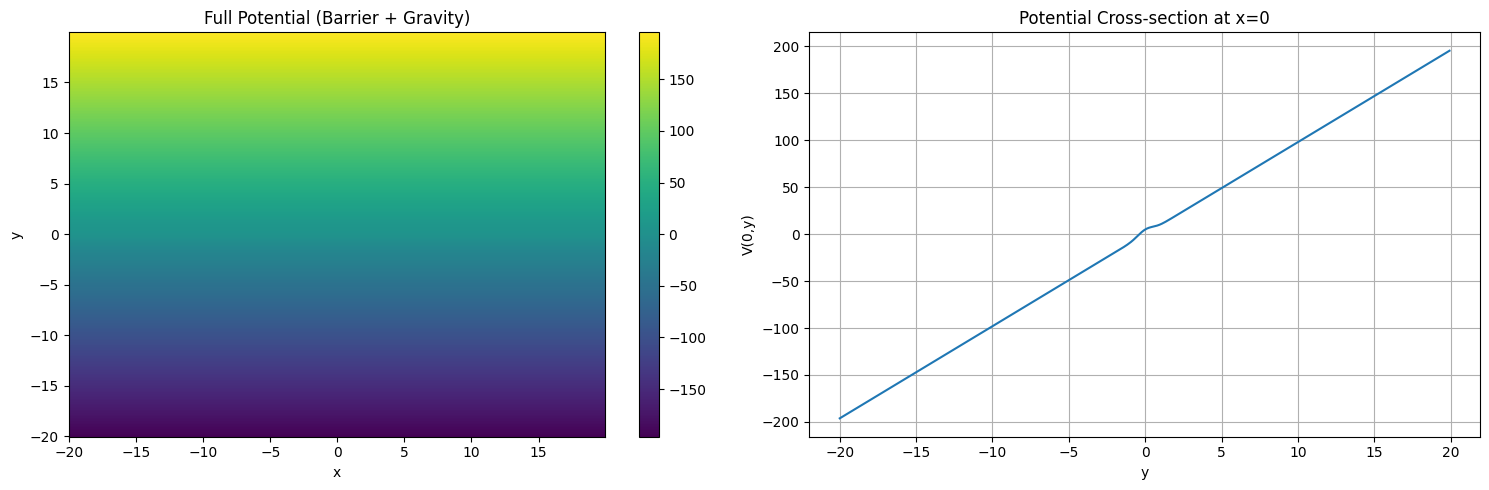

Animation saved as: simulations/20250325_01-16_quantum_evolution.mp4


In [ ]:
params = {
	'x_min': -20, 'x_max': 20, 'Nx': 128*4,
	'y_min': -20, 'y_max': 20, 'Ny': 128*4,
	'n_steps': 2000, 'dt': 0.01,
	'barrier_center_y': 0, 'barrier_strength': 100,
	'barrier_width': 1,
	'x0': 0, 'y0': 15, 'p0x': 0, 'p0y': 0.0
}

simulation_data = simulate_2d(**params)

# Plot the potential
fig_potential = plot_potential(
	np.array(simulation_data['x']),
	np.array(simulation_data['y'])
)
plt.show()

# Create animation
animation_file = create_animation(simulation_data, output_file=f'simulations/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_quantum_evolution.mp4', fps=1/params['dt'])
log_simulation_parameters(animation_file, params)
print(f"Animation saved as: {animation_file}")

2 particle simulations

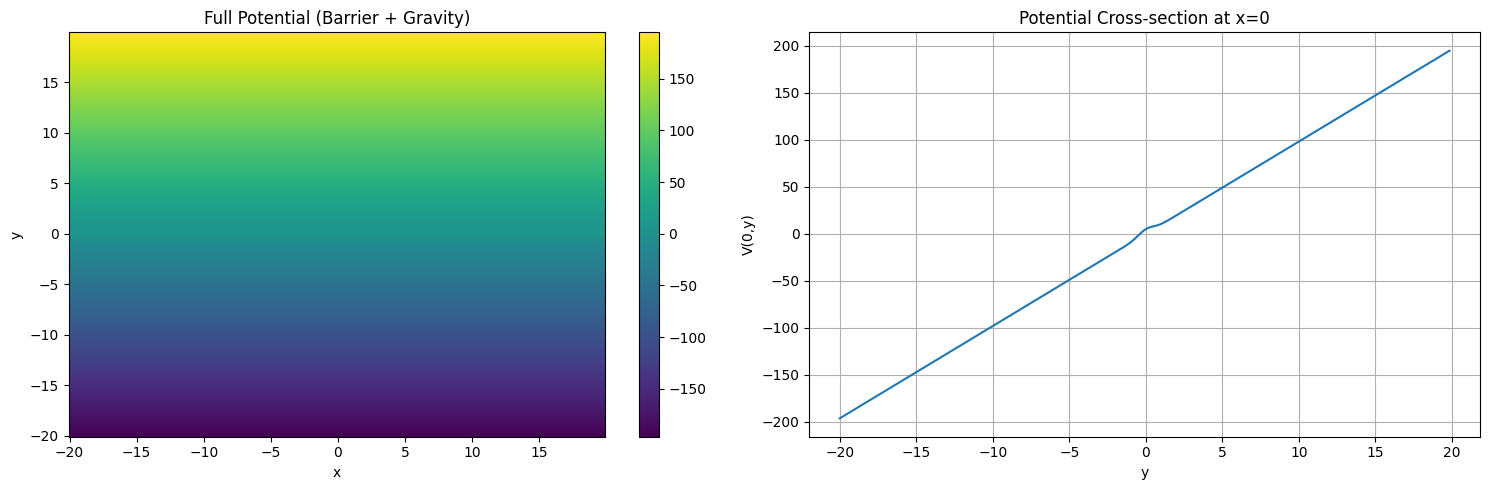

Animation saved as: simulations/20250320_22-41_quantum_evolution.mp4


In [3]:
params = {
	'x_min': -20, 'x_max': 20, 'Nx': 128*2**1,
	'y_min': -20, 'y_max': 20, 'Ny': 128*2**1,
	'n_steps': 2000, 'dt': 0.01,
	'barrier_center_y': 0, 'barrier_strength': 2,
	'barrier_width': 1,
	'x0': -15, 'y0': 5, 'p0x': 1, 'p0y': 0.0
}

simulation_data = simulate_2d_2_particles(**params)

# Plot the potential
fig_potential = plot_potential(
	np.array(simulation_data['x']),
	np.array(simulation_data['y'])
)
plt.show()

# Create animation
animation_file = create_animation(simulation_data, output_file=f'simulations/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_quantum_evolution.mp4', fps=1/params['dt'])
log_simulation_parameters(animation_file, params)
print(f"Animation saved as: {animation_file}")

# Probability Current Plotting

In [4]:
def plot_probability_current_at_boundary(simulation_data, y_idx=0):
    """
    Plot probability current at y=-L for all x positions and times.
    
    Parameters:
        simulation_data: dict
            Output from simulate_2d function
        y_idx: int
            Index of y position to plot (default 0 for y=-L)
    """
    x = np.array(simulation_data['x'])
    t = np.array(simulation_data['t'])
    jy = np.array(simulation_data['jy'])
    
    # Extract jy at the specified y position for all x and t
    jy_boundary = jy[:, :, y_idx]  # Shape: (time, x)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create heatmap
    im = ax.pcolormesh(x, t, jy_boundary, shading='auto', cmap='RdBu')
    plt.colorbar(im, ax=ax, label='Probability current (y-component)')
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title('Probability Current at y=-L')
    
    plt.tight_layout()
    return fig

# Optional: To create an animated line plot
def create_boundary_current_animation(simulation_data, y_idx=0, output_file='boundary_current_evolution.mp4', fps=30):
    """
    Create an MP4 animation of the probability current at y=-L.
    
    Parameters:
        simulation_data: dict
            Output from simulate_2d function
        y_idx: int
            Index of y position to plot (default 0 for y=-L)
        output_file: str
            Name of the output MP4 file
        fps: int
            Frames per second for the animation
    """
    x = np.array(simulation_data['x'])
    t = np.array(simulation_data['t'])
    jy = np.array(simulation_data['jy'])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])
    
    # Setup heatmap in top subplot
    jy_boundary = jy[:, :, y_idx]  # Shape: (time, x)
    im = ax1.pcolormesh(x, t, jy_boundary, shading='auto', cmap='RdBu')
    plt.colorbar(im, ax=ax1, label='Probability current (y-component)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('t')
    ax1.set_title('Probability Current at y=-L (Full Timeline)')
    
    # Setup line plot in bottom subplot
    line, = ax2.plot(x, jy_boundary[0])
    time_marker, = ax1.plot([x[0], x[-1]], [0, 0], 'r-', lw=2)  # Time indicator line
    ax2.set_xlabel('x')
    ax2.set_ylabel('Current')
    ax2.grid(True)
    
    # Set y-limits for line plot
    y_min = np.min(jy_boundary)
    y_max = np.max(jy_boundary)
    margin = 0.1 * (y_max - y_min)
    ax2.set_ylim(y_min - margin, y_max + margin)
    
    title2 = ax2.set_title(f't = {t[0]:.2f}')
    
    def update(frame):
        # Update line plot
        line.set_ydata(jy_boundary[frame])
        
        # Update time indicator
        time_marker.set_ydata([t[frame], t[frame]])
        
        # Update title
        title2.set_text(f't = {t[frame]:.2f}')
        
        return line, time_marker, title2
    
    # Create animation
    anim = FuncAnimation(
        fig, update,
        frames=len(t),
        interval=1000/fps,  # interval in milliseconds
        blit=True
    )
    
    # Save animation
    writer = animation.FFMpegWriter(fps=fps, bitrate=2000)
    plt.tight_layout()
    anim.save(output_file, writer=writer)
    plt.close()
    
    return output_file


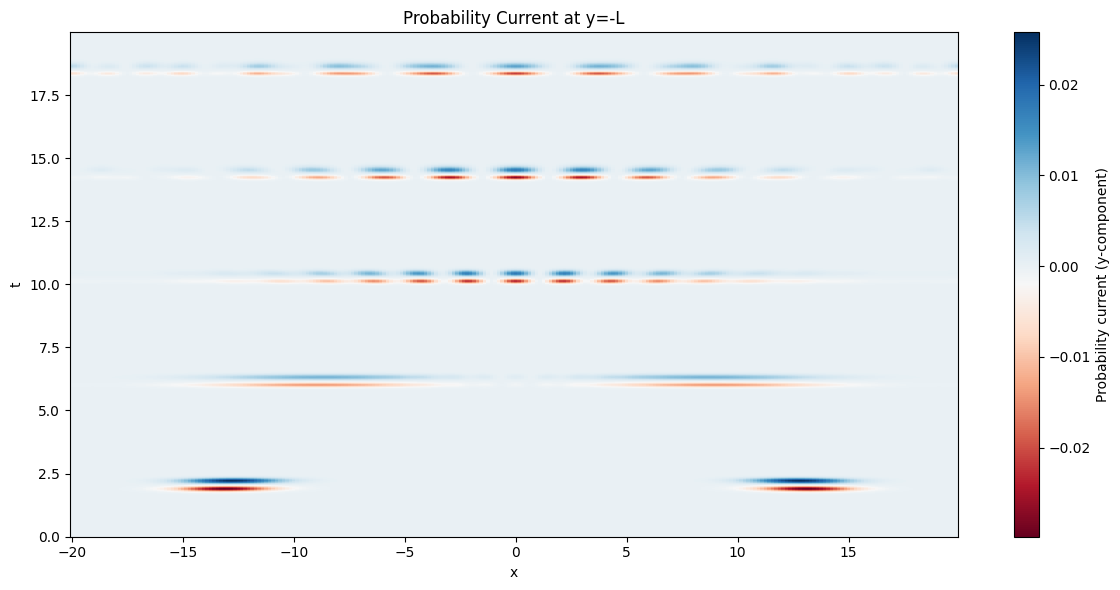

In [6]:
# Heatmap, at y=-L, across all x position, and all t times
fig = plot_probability_current_at_boundary(simulation_data, 3*15)
plt.show()

# Plot animation of probability current at y=-L (takes 5 minutes)
animation_file = create_boundary_current_animation(
        simulation_data,
        output_file=f'simulations/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_boundary_current.mp4',
        fps=1/params['dt']
    )

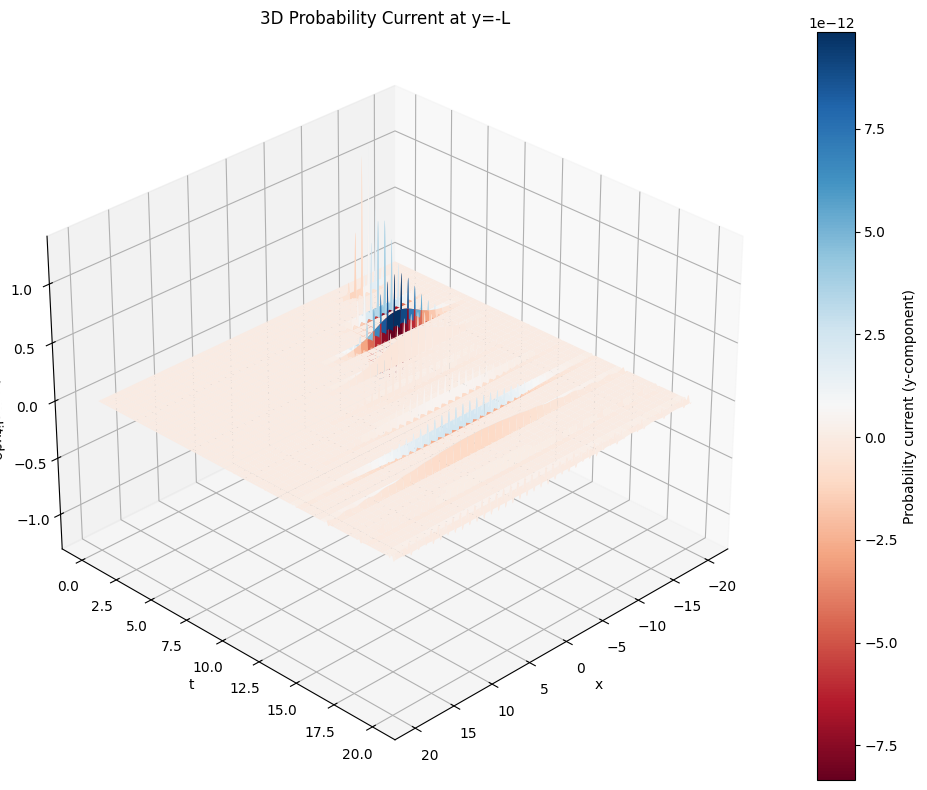

In [24]:
# For a static 3D plot (no animation)
def plot_3d_boundary_current_static(simulation_data, y_idx=-2, view_angle=(30, 45)):
    """
    Create a static 3D surface plot of the probability current at y=-L.
    
    Parameters:
        simulation_data: dict
            Output from simulate_2d function
        y_idx: int
            Index of y position to plot (default 0 for y=-L)
        view_angle: tuple
            (elevation, azimuth) viewing angle in degrees
    """
    x = np.array(simulation_data['x'])
    t = np.array(simulation_data['t'])
    jy = np.array(simulation_data['jy'])
    
    # Extract boundary current data
    jy_boundary = jy[:, :, y_idx]
    
    # Create meshgrid for 3D surface
    X, T = np.meshgrid(x, t)
    
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create surface plot
    surf = ax.plot_surface(X, T, jy_boundary, cmap='RdBu',
                          linewidth=0, antialiased=True)
    
    # Add color bar
    plt.colorbar(surf, ax=ax, label='Probability current (y-component)')
    
    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('Current amplitude')
    ax.set_title('3D Probability Current at y=-L')
    
    # Set view angle
    ax.view_init(*view_angle)
    
    plt.tight_layout()
    return fig

# Usage example:
if __name__ == "__main__":
    # # For animated rotating view
    # animation_file = plot_3d_boundary_current(
    #     simulation_data,
    #     output_file=f'simulations/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_boundary_current_3d.mp4',
    #     fps=30
    # )
    # print(f"Animation saved as: {animation_file}")
    
    # For static view
    fig = plot_3d_boundary_current_static(simulation_data)
    plt.show()